In [1]:
pip install missingno

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import missingno as msno
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [3]:
! pip install koreanize_matplotlib
import koreanize_matplotlib

Defaulting to user installation because normal site-packages is not writeable


In [7]:
brand_frcs_df = pd.read_csv('./brand_frcs_stats_2023_full.csv')  
brand_frcs_df.head()

,yr,indutyLclasNm,indutyMlsfcNm,corpNm,brandNm,frcsCnt,newFrcsRgsCnt,ctrtEndCnt,ctrtCncltnCnt,nmChgCnt,avrgSlsAmt,arUnitAvrgSlsAmt
0,2023,외식,한식,8797푸드,돼지가 김치찜했어,4,2,0,0,0,0,0
1,2023,외식,한식,(주)위푸드마켓,돼지33,1,0,1,0,0,276000,27600
2,2023,외식,한식,(주)네오플러스,돼왕국밥,0,0,0,0,0,0,0
3,2023,외식,한식,(주)덩실덩실,돼슐랭,0,0,0,0,0,0,0
4,2023,외식,한식,(주)와이앤티푸드,동해물과 아구찜,11,17,6,0,0,0,0


In [9]:
df = pd.read_csv('./brand_frcs_stats_2023_full.csv')  

In [10]:
df = df.rename(columns={
    "yr": "기준연도",
    "indutyLclasNm": "업종대분류",
    "indutyMlsfcNm": "업종중분류",
    "corpNm": "법인명",
    "brandNm": "브랜드명",
    "frcsCnt": "가맹점수",
    "newFrcsRgsCnt": "신규가맹점등록수",
    "ctrtEndCnt": "계약만료수",
    "ctrtCncltnCnt": "계약해지수",
    "nmChgCnt": "상호변경수",
    "avrgSlsAmt": "연평균매출액",
    "arUnitAvrgSlsAmt": "단위면적당평균매출액"
    
})

In [11]:
df

,기준연도,업종대분류,업종중분류,법인명,브랜드명,가맹점수,신규가맹점등록수,계약만료수,계약해지수,상호변경수,연평균매출액,단위면적당평균매출액
0,2023,외식,한식,8797푸드,돼지가 김치찜했어,4,2,0,0,0,0,0
1,2023,외식,한식,(주)위푸드마켓,돼지33,1,0,1,0,0,276000,27600
2,2023,외식,한식,(주)네오플러스,돼왕국밥,0,0,0,0,0,0,0
3,2023,외식,한식,(주)덩실덩실,돼슐랭,0,0,0,0,0,0,0
4,2023,외식,한식,(주)와이앤티푸드,동해물과 아구찜,11,17,6,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
11162,2023,서비스,기타 서비스,(주)아이센스티앤씨,CHOSIM(초심)\t,184,15,0,3,3,87498,1580
11163,2023,서비스,기타 서비스,헨즈(HENZ),HENZ music studio(헨즈뮤직스튜디오),10,0,3,0,0,0,0
11164,2023,서비스,기타 서비스,에이치알심리상담프랜차이즈,HR인(에이치알인),9,2,0,1,0,0,0
11165,2023,서비스,기타 서비스,(주)인토에스디,INTO STUDY PLACE(인토스터디플레이스),9,2,1,0,0,0,0


In [12]:
df2023 = df[df['기준연도']==2023].copy()

In [13]:
df2023.count()

기준연도          11167
업종대분류         11167
업종중분류         11167
법인명           11167
브랜드명          11167
가맹점수          11167
신규가맹점등록수      11167
계약만료수         11167
계약해지수         11167
상호변경수         11167
연평균매출액        11167
단위면적당평균매출액    11167
dtype: int64

In [14]:
df2023.shape

(11167, 12)

In [15]:
df2023.describe()

,기준연도,가맹점수,신규가맹점등록수,계약만료수,계약해지수,상호변경수,연평균매출액,단위면적당평균매출액
count,11167.0,11167.000000,11167.000000,11167.000000,11167.00000,11167.000000,1.116700e+04,1.116700e+04
mean,2023.0,27.231127,5.535775,2.559506,0.89075,1.301872,1.301739e+05,5.752394e+03
std,0.0,318.889761,65.757336,31.418612,12.25569,18.940344,1.320549e+06,1.305059e+05
min,2023.0,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000e+00,0.000000e+00
25%,2023.0,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000e+00,0.000000e+00
50%,2023.0,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000e+00,0.000000e+00
75%,2023.0,11.000000,2.000000,1.000000,0.00000,0.000000,1.522400e+05,6.549500e+03
max,2023.0,17516.000000,5563.000000,3067.000000,949.00000,1233.000000,1.363066e+08,1.373510e+07


In [27]:
df2023.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11167 entries, 26765 to 37931
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  11167 non-null  int64 
 1   기준연도        11167 non-null  int64 
 2   업종대분류       11167 non-null  object
 3   업종중분류       11167 non-null  object
 4   법인명         11167 non-null  object
 5   브랜드명        11167 non-null  object
 6   가맹점수        11167 non-null  int64 
 7   신규가맹점등록수    11167 non-null  int64 
 8   계약만료수       11167 non-null  int64 
 9   계약해지수       11167 non-null  int64 
 10  상호변경수       11167 non-null  int64 
 11  연평균매출액      11167 non-null  int64 
 12  단위면적당평균매출액  11167 non-null  int64 
dtypes: int64(9), object(4)
memory usage: 1.2+ MB


In [39]:
df2023[df2023['가맹점수']==0].count()

Unnamed: 0    5162
기준연도          5162
업종대분류         5162
업종중분류         5162
법인명           5162
브랜드명          5162
가맹점수          5162
신규가맹점등록수      5162
계약만료수         5162
계약해지수         5162
상호변경수         5162
연평균매출액        5162
단위면적당평균매출액    5162
가맹점증가율         116
점포당평균매출          3
해지비율_신규대비      162
평균면적_추정          3
dtype: int64

In [44]:
for col in df2023.columns:
    print('\n컬럼명 :', col)
    print(df2023[df2023[col]==0].count())


컬럼명 : Unnamed: 0
Unnamed: 0    0
기준연도          0
업종대분류         0
업종중분류         0
법인명           0
브랜드명          0
가맹점수          0
신규가맹점등록수      0
계약만료수         0
계약해지수         0
상호변경수         0
연평균매출액        0
단위면적당평균매출액    0
가맹점증가율        0
점포당평균매출       0
해지비율_신규대비     0
평균면적_추정       0
dtype: int64

컬럼명 : 기준연도
Unnamed: 0    0
기준연도          0
업종대분류         0
업종중분류         0
법인명           0
브랜드명          0
가맹점수          0
신규가맹점등록수      0
계약만료수         0
계약해지수         0
상호변경수         0
연평균매출액        0
단위면적당평균매출액    0
가맹점증가율        0
점포당평균매출       0
해지비율_신규대비     0
평균면적_추정       0
dtype: int64

컬럼명 : 업종대분류
Unnamed: 0    0
기준연도          0
업종대분류         0
업종중분류         0
법인명           0
브랜드명          0
가맹점수          0
신규가맹점등록수      0
계약만료수         0
계약해지수         0
상호변경수         0
연평균매출액        0
단위면적당평균매출액    0
가맹점증가율        0
점포당평균매출       0
해지비율_신규대비     0
평균면적_추정       0
dtype: int64

컬럼명 : 업종중분류
Unnamed: 0    0
기준연도          0
업종대분류         0
업종중분류         0
법인명           0
브랜드명     

In [16]:
df2023["가맹점증가율"] = df2023["신규가맹점등록수"] / df2023["가맹점수"].replace(0, np.nan)
df2023["점포당평균매출"] = df2023["연평균매출액"] / df2023["가맹점수"].replace(0, np.nan)
df2023["해지비율_신규대비"] = df2023["계약해지수"] / df2023["신규가맹점등록수"].replace(0, np.nan)
df2023["평균면적_추정"] = df2023["연평균매출액"] / df2023["단위면적당평균매출액"].replace(0, np.nan)

In [17]:
features = ["가맹점증가율", "점포당평균매출", "해지비율_신규대비", "평균면적_추정"]
X = df2023[features]

In [18]:
X.describe()

,가맹점증가율,점포당평균매출,해지비율_신규대비,평균면적_추정
count,6005.000000,6.005000e+03,4322.000000,4168.000000
mean,0.342477,3.409413e+04,0.329618,33.725019
std,0.403177,1.354319e+05,3.796485,44.812308
min,0.000000,0.000000e+00,0.000000,0.000019
25%,0.000000,0.000000e+00,0.000000,14.241048
50%,0.176471,5.294222e+03,0.000000,22.199226
75%,0.600000,2.404392e+04,0.000000,38.521392
max,7.666667,3.788601e+06,237.250000,1418.942424


In [19]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11167 entries, 0 to 11166
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   가맹점증가율     6005 non-null   float64
 1   점포당평균매출    6005 non-null   float64
 2   해지비율_신규대비  4322 non-null   float64
 3   평균면적_추정    4168 non-null   float64
dtypes: float64(4)
memory usage: 349.1 KB


In [20]:
X_clean = X.replace([np.inf, -np.inf], np.nan).dropna()
print(f"학습에 사용 가능한 행 수: {X_clean.shape[0]}")
print(X_clean.describe())

학습에 사용 가능한 행 수: 3049
            가맹점증가율       점포당평균매출    해지비율_신규대비      평균면적_추정
count  3049.000000  3.049000e+03  3049.000000  3049.000000
mean      0.391326  3.431467e+04     0.414280    29.970381
std       0.359846  1.099533e+05     4.497702    28.188586
min       0.001337  8.000000e-01     0.000000     0.000019
25%       0.125000  3.295585e+03     0.000000    13.895156
50%       0.272727  1.030656e+04     0.000000    20.710936
75%       0.578947  2.869900e+04     0.000000    35.887450
max       7.666667  2.675837e+06   237.250000   368.627997


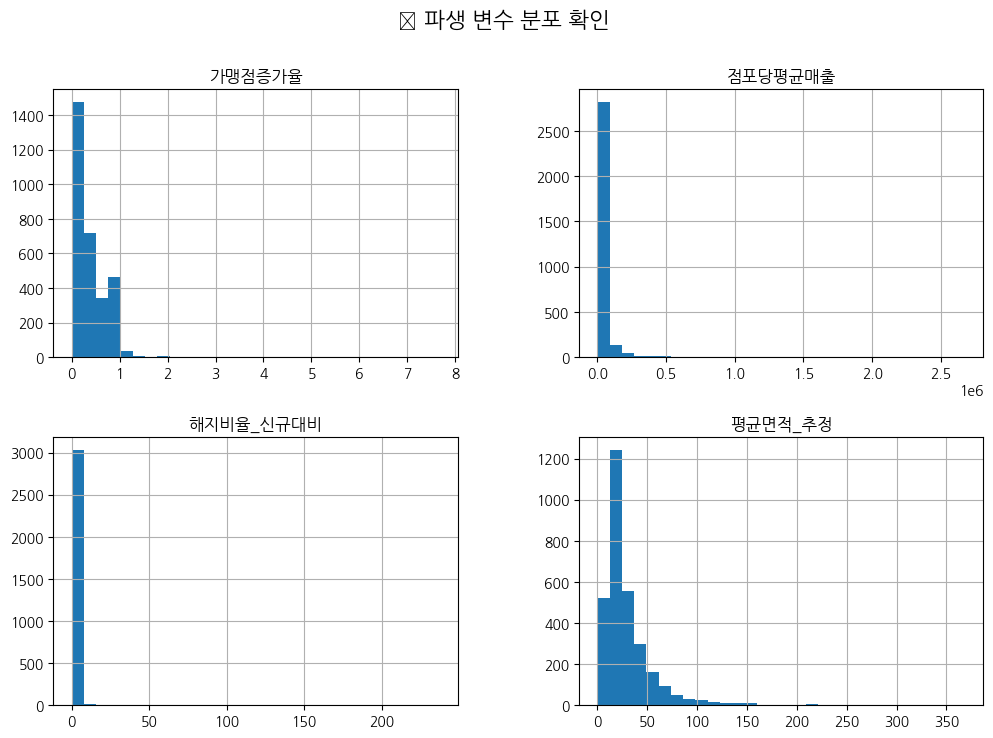

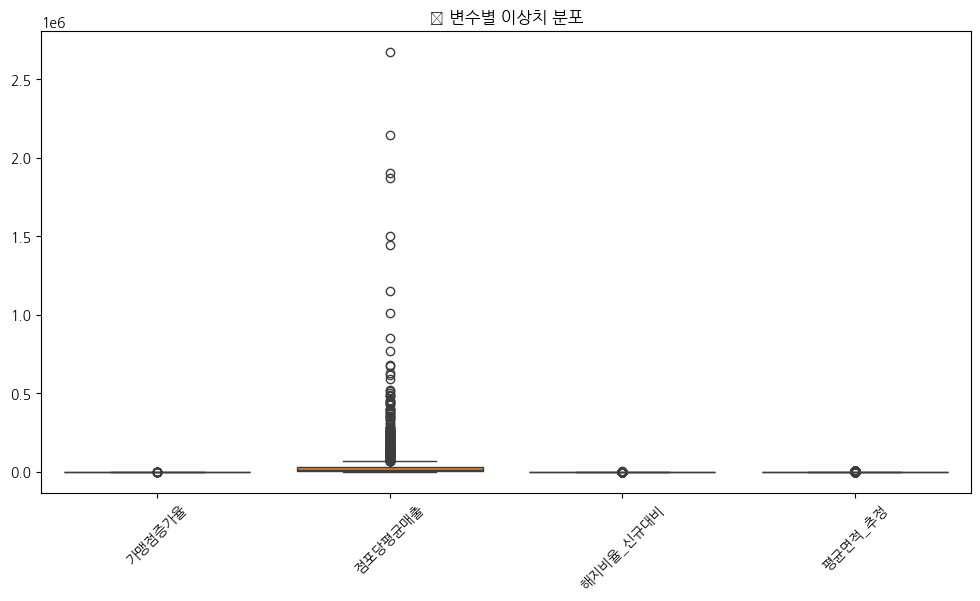

In [21]:
X_clean.hist(bins=30, figsize=(12, 8))
plt.suptitle("📊 파생 변수 분포 확인", fontsize=16)
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(data=X_clean)
plt.title("📦 변수별 이상치 분포")
plt.xticks(rotation=45)
plt.show()

In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.cm as cm

In [23]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_clean)

X_scaled_df = pd.DataFrame(X_scaled, columns=X_clean.columns, index=X_clean.index)

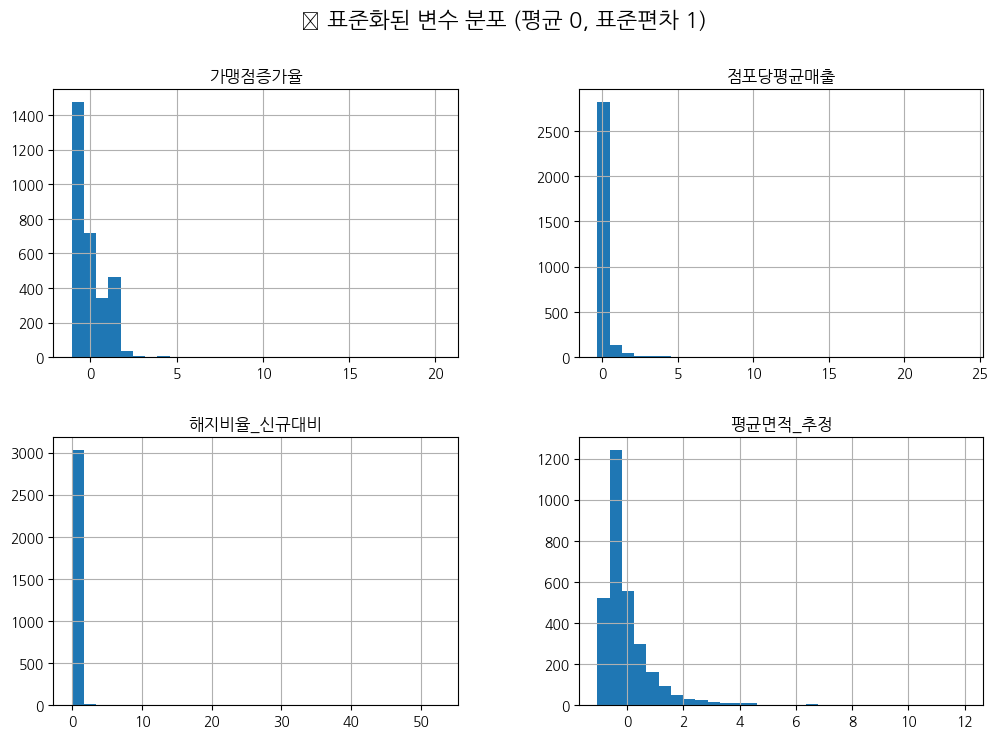

In [24]:
X_scaled_df.hist(bins=30, figsize=(12, 8))
plt.suptitle("📊 표준화된 변수 분포 (평균 0, 표준편차 1)", fontsize=16)
plt.show()

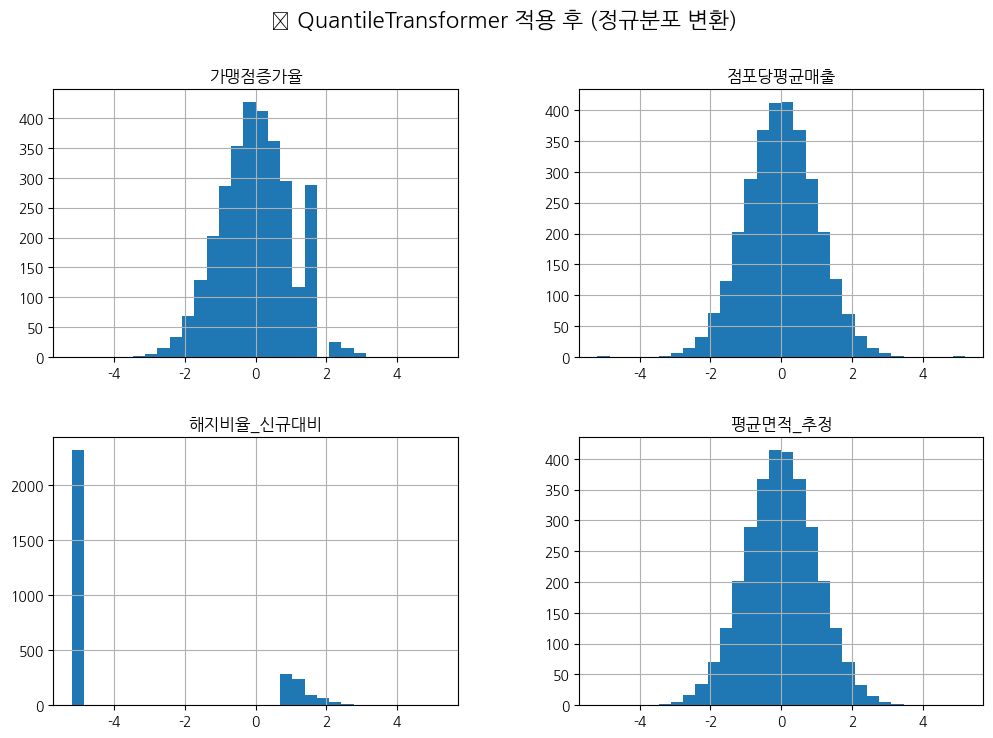

In [25]:
from sklearn.preprocessing import QuantileTransformer

qt_scaler = QuantileTransformer(output_distribution='normal', random_state=42)
X_qt_scaled = qt_scaler.fit_transform(X_clean)

X_qt_scaled_df = pd.DataFrame(X_qt_scaled, columns=X_clean.columns, index=X_clean.index)

# 히스토그램으로 분포 확인
X_qt_scaled_df.hist(bins=30, figsize=(12, 8))
plt.suptitle("📊 QuantileTransformer 적용 후 (정규분포 변환)", fontsize=16)
plt.show()

In [29]:
from sklearn.cluster import KMeans

# 클러스터 수 설정
kmean = KMeans(n_clusters=8, n_init='auto', random_state=111)

# 모델 학습
kmean.fit(X_qt_scaled_df)

# 클러스터 중심과 SSE 출력
centroids = kmean.cluster_centers_
inertia = kmean.inertia_

/Users/leehyunjoo/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/leehyunjoo/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/leehyunjoo/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/leehyunjoo/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: divide by zero encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/Users/leehyunjoo/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: overflow encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/Users/leehyunjoo/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: invalid value encountered in matmul


/Users/leehyunjoo/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/leehyunjoo/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/leehyunjoo/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/leehyunjoo/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: divide by zero encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/Users/leehyunjoo/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: overflow encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/Users/leehyunjoo/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: invalid value encountered in matmul


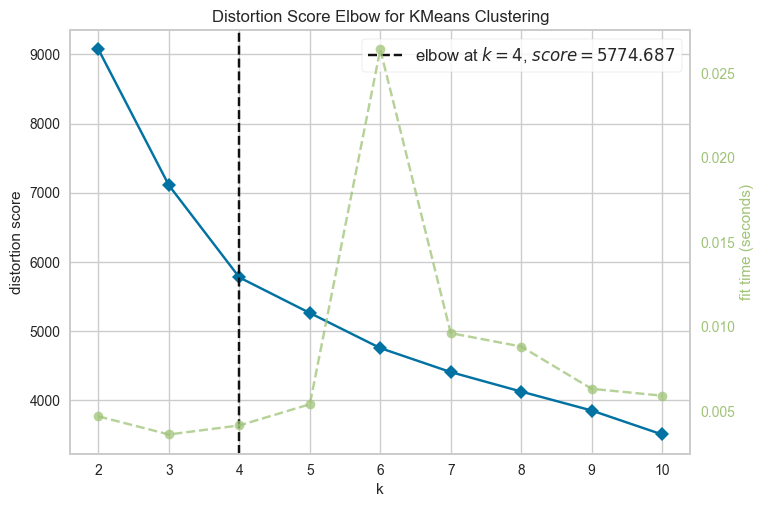

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [31]:
from yellowbrick.cluster import KElbowVisualizer

KEV=KElbowVisualizer(kmean,k=10,n_init='auto')
KEV.fit(X_qt_scaled_df)
KEV.show()

In [32]:
from sklearn.cluster import KMeans

n_cluster = 4

k_means = KMeans(n_clusters=n_cluster, n_init="auto", random_state=111)
cluster_labels = k_means.fit_predict(X_qt_scaled_df)

# 전체 평균 실루엣 점수
silhouette_avg = silhouette_score(X_qt_scaled_df, cluster_labels)
print(f"평균 실루엣 점수: {silhouette_avg:.4f}")
# 결과를 데이터프레임에 추가
#X_qt_scaled_df["cluster"] = clusters

평균 실루엣 점수: 0.3698


/Users/leehyunjoo/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/leehyunjoo/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/leehyunjoo/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/leehyunjoo/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: divide by zero encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/Users/leehyunjoo/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: overflow encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/Users/leehyunjoo/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: invalid value encountered in matmul


/Users/leehyunjoo/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/leehyunjoo/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/leehyunjoo/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


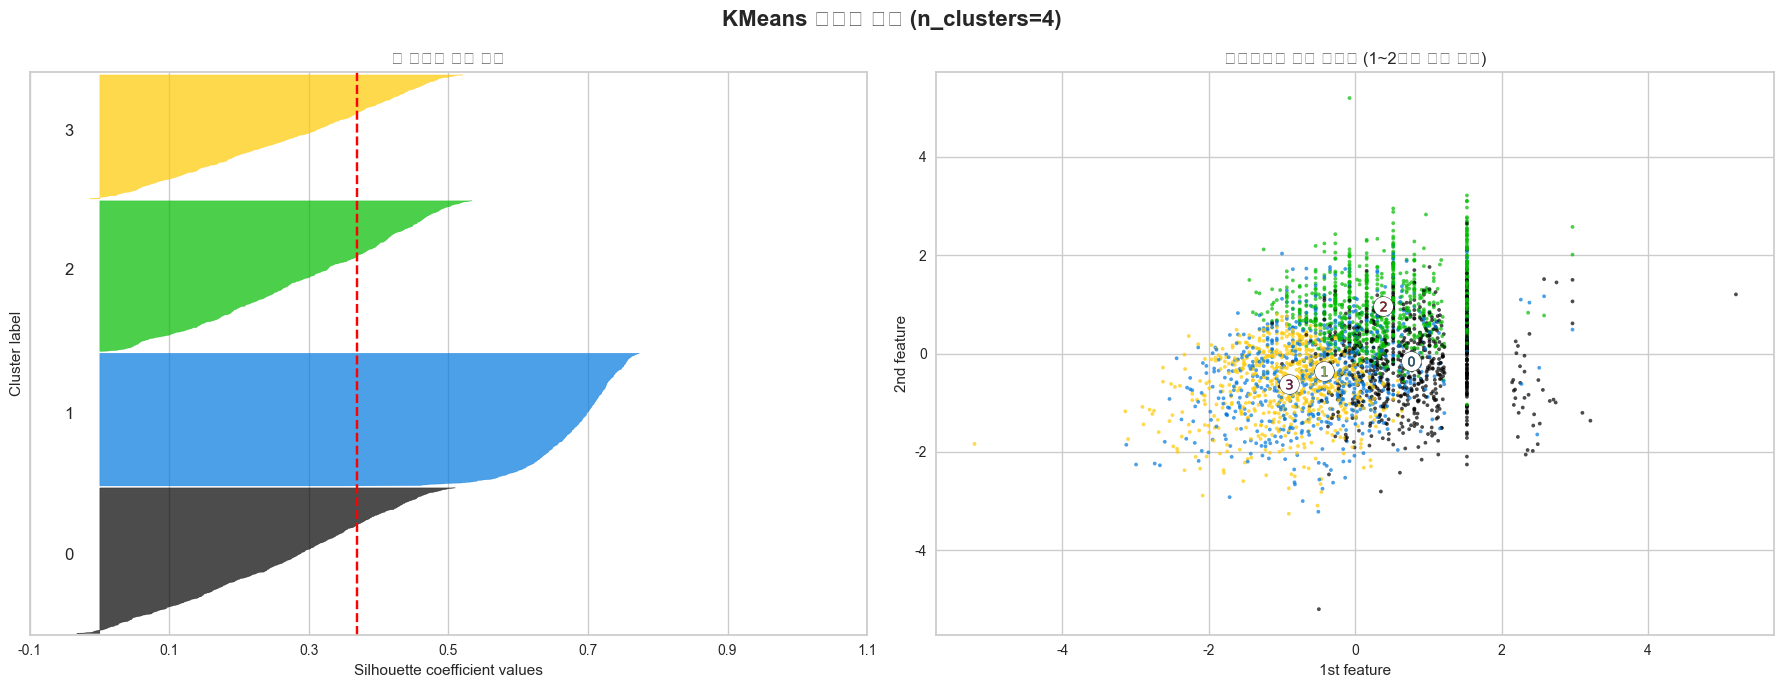

In [33]:
# 샘플별 실루엣 값 계산
sample_silhouette_values = silhouette_samples(X_qt_scaled_df, cluster_labels)

# 시각화
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(18, 7)

# 실루엣 plot
ax1.set_xlim([-0.1, 1])
ax1.set_ylim([0, len(X_qt_scaled_df) + (n_cluster + 1) * 10])

y_lower = 10
for i in range(n_cluster):
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / n_cluster)
    ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)

    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10

ax1.set_title("📈 실루엣 계수 플롯")
ax1.set_xlabel("Silhouette coefficient values")
ax1.set_ylabel("Cluster label")
ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
ax1.set_yticks([])
ax1.set_xticks(np.arange(-0.1, 1.1, 0.2))

# PCA 없이 단순히 앞 두 변수로 분포 시각화
colors = cm.nipy_spectral(cluster_labels.astype(float) / n_cluster)
ax2.scatter(X_qt_scaled_df.iloc[:, 0], X_qt_scaled_df.iloc[:, 1],
            marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k")

centers = k_means.cluster_centers_
ax2.scatter(centers[:, 0], centers[:, 1], marker="o", c="white",
            alpha=1, s=200, edgecolor="k")

for i, c in enumerate(centers):
    ax2.scatter(c[0], c[1], marker=f"${i}$", alpha=1, s=50, edgecolor="k")

ax2.set_title("클러스터링 결과 시각화 (1~2번째 피처 기준)")
ax2.set_xlabel("1st feature")
ax2.set_ylabel("2nd feature")

plt.suptitle(f"KMeans 실루엣 분석 (n_clusters={n_cluster})", fontsize=16, fontweight="bold")
plt.tight_layout()
plt.show()